# Author Topic Modeling

A project to introduce myself to NLP: a very basic attempt at topic modelling this Spooky Author dataset: https://www.kaggle.com/c/spooky-author-identification

For this project, I was more interested in visualizing salient terms for each of the 3 authors in the dataset, than I was predicting which text was written by which author.  

Topic modelling is the process in which you try uncover abstract themes or "topics" based on the underlying documents and words in a corpus of text. 

I will use 2 techniques: Latent Dirichlet Allocation (LDA) and the second Non-negative Matrix Factorization (NMF). 

**Outline:**
- Exploratory Data Analysis (EDA) and Wordclouds: Analyzing the data by generating simple statistics such word frequencies over the different authors as well as plotting some wordclouds (with image masks).

- Natural Language Processing (NLP) with NLTK (Natural Language Toolkit): Introducing basic text processing methods such as tokenizations, stop word removal, stemming and vectorizing text via term frequencies (TF) as well as the inverse document frequencies (TF-IDF)

- Topic Modelling with LDA 

##Imports 

In [4]:
import pandas as pd 
#import base64 
import numpy as np
import plotly as px
import matplotlib.pyplot as plt
import sklearn
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import codecs
import nltk 
from nltk.probability import FreqDist
from PIL import Image
 

## Import training and test data 

I will use 

In [5]:


train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv("/content/test.csv")
train_df.head(), test_df.head()

(        id                                               text author
 0  id26305  This process, however, afforded me no means of...    EAP
 1  id17569  It never once occurred to me that the fumbling...    HPL
 2  id11008  In his left hand was a gold snuff box, from wh...    EAP
 3  id27763  How lovely is spring As we looked from Windsor...    MWS
 4  id12958  Finding nothing else, not even gold, the Super...    HPL,
         id                                               text
 0  id02310  Still, as I urged our leaving Ireland with suc...
 1  id24541  If a fire wanted fanning, it could readily be ...
 2  id00134  And when they had broken down the frail door t...
 3  id27757  While I was thinking how I should possibly man...
 4  id04081  I am not sure to what limit his knowledge may ...)

## Exploratory Data Analysis (EDA) and Wordclouds:

Analyzing the data by generating simple statistics such word frequencies over the different authors as well as plotting some wordclouds (with image masks).


### Lowercase 

In [6]:
#turn every text to lowercase 

# Loop through each row
for index, row in train_df.iterrows():
    # Access the values of each column by its column name
    row['text'] = row['text'].lower()

print(train_df)


            id                                               text author
0      id26305  this process, however, afforded me no means of...    EAP
1      id17569  it never once occurred to me that the fumbling...    HPL
2      id11008  in his left hand was a gold snuff box, from wh...    EAP
3      id27763  how lovely is spring as we looked from windsor...    MWS
4      id12958  finding nothing else, not even gold, the super...    HPL
...        ...                                                ...    ...
19574  id17718  i could have fancied, while i looked at it, th...    EAP
19575  id08973  the lids clenched themselves together as if in...    EAP
19576  id05267  mais il faut agir that is to say, a frenchman ...    EAP
19577  id17513  for an item of news like this, it strikes us i...    EAP
19578  id00393  he laid a gnarled claw on my shoulder, and it ...    HPL

[19579 rows x 3 columns]


### Tokenize

In [7]:
#tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [8]:
#train_df['text']

In [9]:
# Create a new column 'tokens' and add the tokens to it
train_df['tokens'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
print(train_df)

            id                                               text author  \
0      id26305  this process, however, afforded me no means of...    EAP   
1      id17569  it never once occurred to me that the fumbling...    HPL   
2      id11008  in his left hand was a gold snuff box, from wh...    EAP   
3      id27763  how lovely is spring as we looked from windsor...    MWS   
4      id12958  finding nothing else, not even gold, the super...    HPL   
...        ...                                                ...    ...   
19574  id17718  i could have fancied, while i looked at it, th...    EAP   
19575  id08973  the lids clenched themselves together as if in...    EAP   
19576  id05267  mais il faut agir that is to say, a frenchman ...    EAP   
19577  id17513  for an item of news like this, it strikes us i...    EAP   
19578  id00393  he laid a gnarled claw on my shoulder, and it ...    HPL   

                                                  tokens  
0      [this, process, ,, ho

In [10]:
#print(train_df['tokens'].head())

### Building a WordCloud of the first author's writing

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


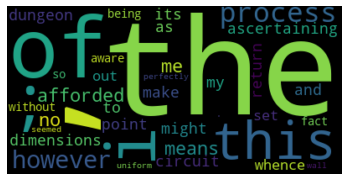

In [11]:
from nltk.corpus import stopwords
nltk.download('stopwords')


# Build a frequency distribution of words
fdist = FreqDist(train_df['tokens'][0])

# Read the image mask
#yogi_mask = np.array(Image.open("Yogi.jpg")


# Create a wordcloud
wordcloud = WordCloud().generate_from_frequencies(fdist) #how do I remove "the" from the wordcloud

# Get a set of common english stopwords to filter them out 
stopwords = set(stopwords.words("english"))

# Remove the stopwords from the wordcloud
filtered_wordcloud =  WordCloud(stopwords = stopwords).generate_from_frequencies(fdist)

#display the word cloud
plt.imshow(filtered_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()



### Remove Stopwords and punctuation


In [12]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


# Define a function to remove stop words from a sentence
def get_filtered_tokens(sentence):
    tokens = tokenizer.tokenize(sentence)
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    return filtered_tokens

# Apply the function to the 'text' column of the dataframe
train_df['filtered_tokens'] = train_df['text'].apply(get_filtered_tokens)

print(train_df)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


            id                                               text author  \
0      id26305  this process, however, afforded me no means of...    EAP   
1      id17569  it never once occurred to me that the fumbling...    HPL   
2      id11008  in his left hand was a gold snuff box, from wh...    EAP   
3      id27763  how lovely is spring as we looked from windsor...    MWS   
4      id12958  finding nothing else, not even gold, the super...    HPL   
...        ...                                                ...    ...   
19574  id17718  i could have fancied, while i looked at it, th...    EAP   
19575  id08973  the lids clenched themselves together as if in...    EAP   
19576  id05267  mais il faut agir that is to say, a frenchman ...    EAP   
19577  id17513  for an item of news like this, it strikes us i...    EAP   
19578  id00393  he laid a gnarled claw on my shoulder, and it ...    HPL   

                                                  tokens  \
0      [this, process, ,, h

OK now our dataframe has a tokens column filtered by common stop words and punctuation


In [13]:
print(train_df.head())

        id                                               text author  \
0  id26305  this process, however, afforded me no means of...    EAP   
1  id17569  it never once occurred to me that the fumbling...    HPL   
2  id11008  in his left hand was a gold snuff box, from wh...    EAP   
3  id27763  how lovely is spring as we looked from windsor...    MWS   
4  id12958  finding nothing else, not even gold, the super...    HPL   

                                              tokens  \
0  [this, process, ,, however, ,, afforded, me, n...   
1  [it, never, once, occurred, to, me, that, the,...   
2  [in, his, left, hand, was, a, gold, snuff, box...   
3  [how, lovely, is, spring, as, we, looked, from...   
4  [finding, nothing, else, ,, not, even, gold, ,...   

                                     filtered_tokens  
0  [process, however, afforded, means, ascertaini...  
1  [never, occurred, fumbling, might, mere, mistake]  
2  [left, hand, gold, snuff, box, capered, hill, ...  
3  [lovely

### Stemming the filtered tokens column

*We will use portstemming, removing common suffixes such as -ing, -ed, -ly, etc, in order to reduce it to its base form. 

In [14]:
from nltk.stem import PorterStemmer

# Create an instance of the Porter stemmer
stemmer = PorterStemmer()

#creating a 'stemmed tokens' column 
train_df['stemmed_tokens'] = train_df['filtered_tokens'].apply(lambda x: [stemmer.stem(i) for i in x])
print(train_df.head())

        id                                               text author  \
0  id26305  this process, however, afforded me no means of...    EAP   
1  id17569  it never once occurred to me that the fumbling...    HPL   
2  id11008  in his left hand was a gold snuff box, from wh...    EAP   
3  id27763  how lovely is spring as we looked from windsor...    MWS   
4  id12958  finding nothing else, not even gold, the super...    HPL   

                                              tokens  \
0  [this, process, ,, however, ,, afforded, me, n...   
1  [it, never, once, occurred, to, me, that, the,...   
2  [in, his, left, hand, was, a, gold, snuff, box...   
3  [how, lovely, is, spring, as, we, looked, from...   
4  [finding, nothing, else, ,, not, even, gold, ,...   

                                     filtered_tokens  \
0  [process, however, afforded, means, ascertaini...   
1  [never, occurred, fumbling, might, mere, mistake]   
2  [left, hand, gold, snuff, box, capered, hill, ...   
3  [lo

### Vectorizing the text: 

*via term frequencies (TF) 

*as well as the inverse document frequencies (TF-IDF)

### Vectorizing via Term Frequencies 

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words = 'english')
tf_matrix = vectorizer.fit_transform([' '.join(x) for x in train_df['stemmed_tokens']])
tf_array = tf_matrix.toarray()
tf_df = pd.DataFrame(data=tf_array,columns = vectorizer.get_feature_names())
print(tf_df)

       aaem  ab  aback  abaft  abandon  abaout  abas  abash  abat  abbey  ...  \
0         0   0      0      0        0       0     0      0     0      0  ...   
1         0   0      0      0        0       0     0      0     0      0  ...   
2         0   0      0      0        0       0     0      0     0      0  ...   
3         0   0      0      0        0       0     0      0     0      0  ...   
4         0   0      0      0        1       0     0      0     0      0  ...   
...     ...  ..    ...    ...      ...     ...   ...    ...   ...    ...  ...   
19574     0   0      0      0        0       0     0      0     0      0  ...   
19575     0   0      0      0        0       0     0      0     0      0  ...   
19576     0   0      0      0        0       0     0      0     0      0  ...   
19577     0   0      0      0        0       0     0      0     0      0  ...   
19578     0   0      0      0        0       0     0      0     0      0  ...   

       æmilianu  æneid  æri

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [16]:
print(train_df.shape)

(19579, 6)


Good this means that our count array rows correspond to each of the author setnences; the columns correspond to the words that are present in all the sentences 

So, what do we do with this tf_df?

### Instead, let's use inverse document frequencies 



In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the list of documents
tfidf_matrix = vectorizer.fit_transform([' '.join(x) for x in train_df['stemmed_tokens']])
tfidf_array = tfidf_matrix.toarray()

tfidf_df = pd.DataFrame(data=tfidf_array, columns = vectorizer.get_feature_names())

print(tfidf_df)


       aaem   ab  aback  abaft   abandon  abaout  abas  abash  abat  abbey  \
0       0.0  0.0    0.0    0.0  0.000000     0.0   0.0    0.0   0.0    0.0   
1       0.0  0.0    0.0    0.0  0.000000     0.0   0.0    0.0   0.0    0.0   
2       0.0  0.0    0.0    0.0  0.000000     0.0   0.0    0.0   0.0    0.0   
3       0.0  0.0    0.0    0.0  0.000000     0.0   0.0    0.0   0.0    0.0   
4       0.0  0.0    0.0    0.0  0.266319     0.0   0.0    0.0   0.0    0.0   
...     ...  ...    ...    ...       ...     ...   ...    ...   ...    ...   
19574   0.0  0.0    0.0    0.0  0.000000     0.0   0.0    0.0   0.0    0.0   
19575   0.0  0.0    0.0    0.0  0.000000     0.0   0.0    0.0   0.0    0.0   
19576   0.0  0.0    0.0    0.0  0.000000     0.0   0.0    0.0   0.0    0.0   
19577   0.0  0.0    0.0    0.0  0.000000     0.0   0.0    0.0   0.0    0.0   
19578   0.0  0.0    0.0    0.0  0.000000     0.0   0.0    0.0   0.0    0.0   

       ...  æmilianu  æneid  ærial  æronaut  ærostat  æschylu  

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [18]:
#just checking that not all the values are == 0 
if (tfidf_df == 0).all().all():
    print("All values in the DataFrame are 0.")
else:
    print("Not all values in the DataFrame are 0.")

Not all values in the DataFrame are 0.


This code is showing a lot of RAM issues 

## Topic Modelling with LDA:

  - We want to implement the topic modelling technique of Latent Dirichlet Allocation (LDA)  

In [19]:
train_df.head()

,id,text,author,tokens,filtered_tokens,stemmed_tokens
0,id26305,"this process, however, afforded me no means of...",EAP,"[this, process, ,, however, ,, afforded, me, n...","[process, however, afforded, means, ascertaini...","[process, howev, afford, mean, ascertain, dime..."
1,id17569,it never once occurred to me that the fumbling...,HPL,"[it, never, once, occurred, to, me, that, the,...","[never, occurred, fumbling, might, mere, mistake]","[never, occur, fumbl, might, mere, mistak]"
2,id11008,"in his left hand was a gold snuff box, from wh...",EAP,"[in, his, left, hand, was, a, gold, snuff, box...","[left, hand, gold, snuff, box, capered, hill, ...","[left, hand, gold, snuff, box, caper, hill, cu..."
3,id27763,how lovely is spring as we looked from windsor...,MWS,"[how, lovely, is, spring, as, we, looked, from...","[lovely, spring, looked, windsor, terrace, six...","[love, spring, look, windsor, terrac, sixteen,..."
4,id12958,"finding nothing else, not even gold, the super...",HPL,"[finding, nothing, else, ,, not, even, gold, ,...","[finding, nothing, else, even, gold, superinte...","[find, noth, els, even, gold, superintend, aba..."


In [20]:
#Split up the dataframe into multiple dataframes, one for each author 

#first see what the values of 'author' column are 

print(train_df['author'].unique())

EAP_train_df = train_df[train_df['author'] == 'EAP']
HPL_train_df = train_df[train_df['author'] == 'HPL']
MWS_train_df = train_df[train_df['author'] == 'MWS']

HPL_train_df.head()


['EAP' 'HPL' 'MWS']


,id,text,author,tokens,filtered_tokens,stemmed_tokens
1,id17569,it never once occurred to me that the fumbling...,HPL,"[it, never, once, occurred, to, me, that, the,...","[never, occurred, fumbling, might, mere, mistake]","[never, occur, fumbl, might, mere, mistak]"
4,id12958,"finding nothing else, not even gold, the super...",HPL,"[finding, nothing, else, ,, not, even, gold, ,...","[finding, nothing, else, even, gold, superinte...","[find, noth, els, even, gold, superintend, aba..."
12,id19764,herbert west needed fresh bodies because his l...,HPL,"[herbert, west, needed, fresh, bodies, because...","[herbert, west, needed, fresh, bodies, life, w...","[herbert, west, need, fresh, bodi, life, work,..."
13,id18886,the farm like grounds extended back very deepl...,HPL,"[the, farm, like, grounds, extended, back, ver...","[farm, like, grounds, extended, back, deeply, ...","[farm, like, ground, extend, back, deepli, hil..."
19,id20836,"his facial aspect, too, was remarkable for its...",HPL,"[his, facial, aspect, ,, too, ,, was, remarkab...","[facial, aspect, remarkable, maturity, though,...","[facial, aspect, remark, matur, though, share,..."


In [21]:
print(EAP_train_df['stemmed_tokens'])

0        [process, howev, afford, mean, ascertain, dime...
2        [left, hand, gold, snuff, box, caper, hill, cu...
6        [astronom, perhap, point, took, refug, suggest...
7                           [surcingl, hung, riband, bodi]
8        [knew, could, say, stereotomi, without, brough...
                               ...                        
19572    [difficulti, attend, respir, mean, great, put,...
19574    [could, fanci, look, emin, landscap, painter, ...
19575                         [lid, clench, togeth, spasm]
19576    [mai, il, faut, agir, say, frenchman, never, f...
19577       [item, news, like, strike, us, coolli, receiv]
Name: stemmed_tokens, Length: 7900, dtype: object


### EAP 

In [27]:
#classifying the topics of the EAP author training data 

import pandas as pd
from nltk.tokenize import word_tokenize
from gensim import corpora, models

texts = EAP_train_df['stemmed_tokens'].values.tolist()

dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

num_topics = 10

lda = models.LdaModel(corpus, id2word=dictionary, num_topics=num_topics)

# for i, topic in lda.print_topics():
#     print(f"Topic {i+1}: {topic}")


/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

### Visualize the topics 

In [30]:
!pip install pyLDAvis
!pip install pyLDAvis.gensim

import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

vis_data1 = gensimvis.prepare(lda, corpus, dictionary)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement pyLDAvis.gensim (from versions: none)
ERROR: No matching distribution found for pyLDAvis.gensim


/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


In [31]:
#Display
pyLDAvis.display(vis_data1)



We have some interesting info here. Especially on the right, where we see the most salient terms. Let's repeat this analysis on the HPL data.

### HPL 

In [32]:
#classifying the topics of the HPL author training data 

import pandas as pd
from nltk.tokenize import word_tokenize
from gensim import corpora, models


texts = HPL_train_df['stemmed_tokens'].values.tolist()

dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

num_topics = 10

lda = models.LdaModel(corpus, id2word=dictionary, num_topics=num_topics)

# for i, topic in lda.print_topics():
#     print(f"Topic {i+1}: {topic}")


/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [33]:
vis_data2 = gensimvis.prepare(lda, corpus, dictionary)
#Display
pyLDAvis.display(vis_data2)



/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


Lastly, let's see what this looks like on the MWS training set.

### MWS 

In [37]:
#classifying the topics of the MWS author training data 

import pandas as pd
from nltk.tokenize import word_tokenize
from gensim import corpora, models


texts = MWS_train_df['stemmed_tokens'].values.tolist()

dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

num_topics = 10

lda = models.LdaModel(corpus, id2word=dictionary, num_topics=num_topics)

# for i, topic in lda.print_topics():
#     print(f"Topic {i+1}: {topic}")

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [38]:
vis_data3 = gensimvis.prepare(lda, corpus, dictionary)
#Display
pyLDAvis.display(vis_data3)